In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from keras.callbacks import ModelCheckpoint
warnings.filterwarnings('ignore')

In [ ]:
# Import data
df_origin = pd.read_csv("/content/pcos_train.csv")
y_train = df_origin['PCOS_diagnosis'].to_numpy()
X_train = df_origin.drop(columns=["PCOS_diagnosis"]).to_numpy()

df_origin.head()

,age,period_intervial,have_weight_gain,have_ex_bodyhair_growth,have_darkening_skin,have_hair_loss,have_pimples,have_consume_fastfood,have_exercise,have_mood_swings,have_regular_periods,period_last,blood_group_A+,blood_group_A-,blood_group_B+,blood_group_B-,blood_group_O+,blood_group_O-,BMI,PCOS_diagnosis
0,0.654398,0.024237,1,0,0,1,0,1,0,1,1,0.121185,0,0,1,0,0,0,0.745982,1
1,0.623978,0.027129,1,1,0,1,0,1,0,1,1,0.108518,0,0,1,0,0,0,0.773394,0
2,0.627350,0.039209,0,0,0,0,0,0,0,1,1,0.196047,1,0,0,0,0,0,0.752636,0
3,0.652737,0.025105,1,0,1,1,1,0,0,1,0,0.175737,1,0,0,0,0,0,0.736492,1
4,0.733273,0.022220,1,0,0,1,0,1,0,0,1,0.111102,0,0,1,0,0,0,0.670428,1


In [ ]:
df = pd.read_csv("/content/pcos_test.csv")
y_test = df['PCOS_diagnosis'].to_numpy()
X_test = df.drop(columns=["PCOS_diagnosis"]).to_numpy()

df.head()

,age,period_intervial,have_weight_gain,have_ex_bodyhair_growth,have_darkening_skin,have_hair_loss,have_pimples,have_consume_fastfood,have_exercise,have_mood_swings,have_regular_periods,period_last,blood_group_A+,blood_group_A-,blood_group_B+,blood_group_B-,blood_group_O+,blood_group_O-,BMI,PCOS_diagnosis
0,0.560052,0.031114,1,1,1,1,1,0,0,1,0,0.186684,0,0,1,0,0,0,0.806550,1
1,0.864322,0.032012,1,1,0,0,0,1,1,1,1,0.160060,0,0,1,0,0,0,0.475714,0
2,0.723221,0.031444,1,0,1,0,0,0,0,1,0,0.125777,1,0,0,0,0,0,0.678339,1
3,0.548211,0.028853,1,1,1,1,1,1,0,1,0,0.115413,0,0,1,0,0,0,0.827836,1
4,0.717963,0.032635,0,0,0,0,1,0,0,0,0,0.097904,0,0,1,0,0,0,0.688388,1


In [ ]:
# Import data
df_syn = pd.read_csv("/content/synthetic_pcos_dataset.csv")
feature_order = ["age", "period_intervial", "have_weight_gain", "have_ex_bodyhair_growth", "have_darkening_skin", "have_hair_loss", "have_pimples", "have_consume_fastfood", "have_exercise", "have_mood_swings", "have_regular_periods", "period_last", "blood_group_A+", "blood_group_A-", "blood_group_B+", "blood_group_B-", "blood_group_O+", "blood_group_O-", "BMI", "PCOS_diagnosis"]
df_syn = df_syn[feature_order] # reorder the columns
df_syn = pd.concat([df_syn,df_origin], axis=0)

y_syn = df_syn['PCOS_diagnosis'].to_numpy()
X_syn = df_syn.drop(columns=["PCOS_diagnosis"]).to_numpy()

df_syn.head()

,age,period_intervial,have_weight_gain,have_ex_bodyhair_growth,have_darkening_skin,have_hair_loss,have_pimples,have_consume_fastfood,have_exercise,have_mood_swings,have_regular_periods,period_last,blood_group_A+,blood_group_A-,blood_group_B+,blood_group_B-,blood_group_O+,blood_group_O-,BMI,PCOS_diagnosis
0,0.812306,0.107264,1,0,0,1,1,0,0,0,0,0.056588,0,0,1,0,0,0,0.869090,1
1,0.868657,0.074537,0,1,1,1,0,1,0,1,0,0.138548,0,0,1,0,0,0,0.720336,0
2,0.600841,0.021926,1,1,1,1,0,0,0,1,1,0.083967,0,0,0,0,0,0,0.748693,1
3,0.618279,0.046140,0,1,0,1,0,0,0,1,1,0.175199,0,0,1,0,0,0,0.725909,0
4,0.641795,0.026243,0,0,1,1,0,1,0,1,0,0.112670,0,0,0,0,0,0,0.842331,1


In [ ]:
df_syn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1646 entries, 0 to 645
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1646 non-null   float64
 1   period_intervial         1646 non-null   float64
 2   have_weight_gain         1646 non-null   int64  
 3   have_ex_bodyhair_growth  1646 non-null   int64  
 4   have_darkening_skin      1646 non-null   int64  
 5   have_hair_loss           1646 non-null   int64  
 6   have_pimples             1646 non-null   int64  
 7   have_consume_fastfood    1646 non-null   int64  
 8   have_exercise            1646 non-null   int64  
 9   have_mood_swings         1646 non-null   int64  
 10  have_regular_periods     1646 non-null   int64  
 11  period_last              1646 non-null   float64
 12  blood_group_A+           1646 non-null   int64  
 13  blood_group_A-           1646 non-null   int64  
 14  blood_group_B+           1646 

In [ ]:
# Import data
df_syn_sel = pd.read_csv("/content/synthetic_pcos_dataset_new.csv")
feature_order_syn_sel = ["have_ex_bodyhair_growth", "have_exercise", "have_regular_periods", "blood_group_A+", "blood_group_B+", "blood_group_O+", "PCOS_diagnosis"]
df_syn_sel = df_syn_sel[feature_order_syn_sel] # reorder the columns
df_syn_sel = pd.concat([df_origin[feature_order_syn_sel],df_syn_sel], axis=0)

y_syn_sel = df_syn_sel['PCOS_diagnosis'].to_numpy()
X_syn_sel = df_syn_sel.drop(columns=["PCOS_diagnosis"]).to_numpy()

df_syn_sel.head()

,have_ex_bodyhair_growth,have_exercise,have_regular_periods,blood_group_A+,blood_group_B+,blood_group_O+,PCOS_diagnosis
0,0,0,1,0,1,0,1
1,1,0,1,0,1,0,0
2,0,0,1,1,0,0,0
3,0,0,0,1,0,0,1
4,0,0,1,0,1,0,1


# Building model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

In [ ]:
class AnnModel:
    def __init__(self, layers, width, inputNum):
        self.layers = layers
        self.width = width
        self.model = keras.Sequential()
        inputLayer=keras.Input(shape=(inputNum,))
        self.model.add(inputLayer)
        layer_container = []
        for i in range(self.layers):
            layer_container.append(keras.layers.Dense(self.width, activation='relu'))

        for layer in layer_container:
            self.model.add(layer)

        outputLayer=keras.layers.Dense(2, activation='softmax')
        self.model.add(outputLayer)

In [ ]:
# simple early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)

In [ ]:
!pip install scikeras

In [ ]:
!pip install -q -U keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.7 MB/s eta 0:00:00


In [ ]:
# https://www.tensorflow.org/tutorials/keras/keras_tuner
import keras_tuner as kt
def hptunning(X_train,y_train):
  # building a model using a model builder function
  def model_builder(hp):
    # defining a set of hyperparametrs for tuning and a range of values for each
    width = hp.Int(name = 'width', min_value = 1, max_value = 200, step = 1)
    layer = hp.Int(name = 'layer', min_value = 1, max_value = 200, step = 1)

    # building a model
    test_model = AnnModel(layer,width,len(X_train[0])).model
    test_model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

    return test_model

  # tuner initialization
  tuner = kt.Hyperband(hypermodel = model_builder,
                      objective = kt.Objective("val_accuracy", direction="max"),
                      max_epochs = 20,
                      project_name='hyperband_tuner',
                      overwrite=True) # use overwirte=true so that the tunner will retrain every time
  tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[es])
  return tuner


In [ ]:
# hp_tuner = hptunning(X_train, y_train)
# best_hps = hp_tuner.get_best_hyperparameters(num_trials=1)[0]

# print(f"""Best width: {best_hps.get('width')}, Best layer: {best_hps.get('layer')}""")

Trial 30 Complete [00h 00m 58s]
val_accuracy: 0.5384615659713745

Best val_accuracy So Far: 0.9153845906257629
Total elapsed time: 00h 23m 19s
Best width: 61, Best layer: 18


In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
# Check point

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

model = AnnModel(best_hps.get('layer'),best_hps.get('width'),len(X_train[0])).model
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=400, validation_data=(X_test,y_test), callbacks=[mc])
# load the saved model
saved_model = load_model('best_model.h5')

Epoch 1/400
16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4664 - loss: 0.6935 

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.4723 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6898
Epoch 2/400
14/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5190 - loss: 0.6716 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5465 - loss: 0.6511 - val_accuracy: 0.8611 - val_loss: 0.4912
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8602 - loss: 0.4713 - val_accuracy: 0.8611 - val_loss: 0.5421
Epoch 4/400
15/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8912 - loss: 0.3598 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8813 - loss: 0.3665 - val_accuracy: 0.9306 - val_loss: 0.2996
Epoch 5/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8544 - loss: 0.3873 - val_accuracy: 0.8611 - val_loss: 0.3360
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8878 - loss: 0.3217 - val_accuracy: 0.9306 - val_loss: 0.2592
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8734 - loss: 0.3242 - val_accuracy: 0.9306 - val_loss: 0.2478
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9019 - loss: 0.2802 - val_accuracy: 0.8611 - val_loss: 0.2985
Epoch 9/400
16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8873 - loss: 0.3109 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8921 - loss: 0.3011 - val_accuracy: 0.9583 - val_loss: 0.1918
Epoch 10/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9116 - loss: 0.2516 - val_accuracy: 0.9444 - val_loss: 0.2164
Epoch 11/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9178 - loss: 0.2364 - val_accuracy: 0.9444 - val_loss: 0.2152
Epoch 12/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9246 - loss: 0.2084 - val_accuracy: 0.9306 - val_loss: 0.2232
Epoch 13/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9141 - loss: 0.2374 - val_accuracy: 0.9167 - val_loss: 0.1827
Epoch 14/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9350 - loss: 0.1990 - val_accuracy: 0.9167 - val_loss: 0.3406
Epoch 15/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9239 - loss: 0.2073 - val_accuracy: 0.9583 - val_loss: 0.2032
Epoch 16/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9305 - loss: 0.2426 - val_accuracy: 0.9444 - val_l

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


<Axes: >

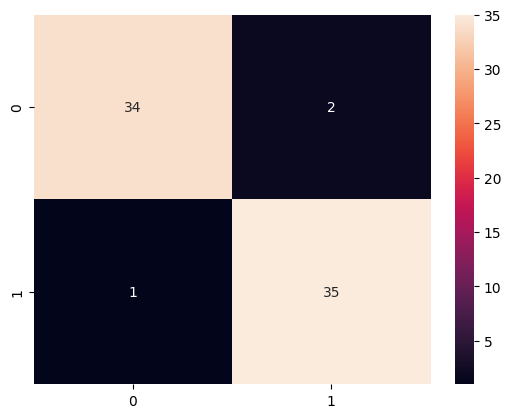

In [ ]:
pre_uptoA1 = saved_model.predict(X_test)

predict = []

for pre in pre_uptoA1:
    max_value = max(pre)
    index = list(pre).index(max_value)
    predict.append(index)

# extract the predicted class labels
cm = confusion_matrix(y_test,predict)

sns.heatmap(cm, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96        36
           1       0.95      0.97      0.96        36

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



In [ ]:
test_loss_uptoA1, test_acc_uptoA1 = saved_model.evaluate(X_test, y_test, verbose=0)
test_acc_uptoA1

0.9583333134651184

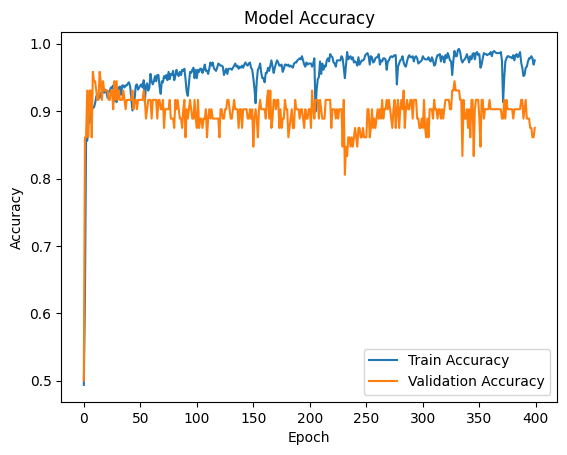

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('accuracy_vs_epoch.png')
plt.show()

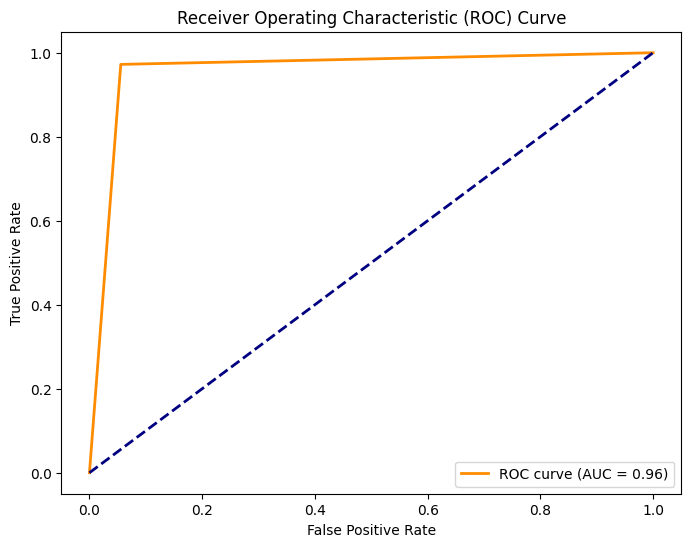

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, predict)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig('ROC curve.png')
plt.show()

#Synthetic Data

In [ ]:
model_syn = AnnModel(18,61,len(X_syn[0])).model
mc = ModelCheckpoint('best_model_syn.h5', monitor='val_accuracy', mode='max', save_best_only=True)
model_syn.compile(loss=keras.losses.sparse_categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])
history_syn = model_syn.fit(X_syn, y_syn, epochs=400, validation_data=(X_test,y_test), callbacks=[mc])
# load the saved model
saved_syn_model = load_model('best_model_syn.h5')

Epoch 1/400
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5011 - loss: 0.6933

52/52 ━━━━━━━━━━━━━━━━━━━━ 26s 54ms/step - accuracy: 0.5008 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5349 - loss: 0.6921

52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5349 - loss: 0.6921 - val_accuracy: 0.8611 - val_loss: 0.6071
Epoch 3/400
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6154 - loss: 0.6721

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6154 - loss: 0.6720 - val_accuracy: 0.8750 - val_loss: 0.5131
Epoch 4/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6262 - loss: 0.6507 - val_accuracy: 0.8472 - val_loss: 0.4609
Epoch 5/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6434 - loss: 0.6321 - val_accuracy: 0.8750 - val_loss: 0.4800
Epoch 6/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6404 - loss: 0.6308 - val_accuracy: 0.7361 - val_loss: 0.5827
Epoch 7/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6368 - loss: 0.6499 - val_accuracy: 0.8611 - val_loss: 0.4986
Epoch 8/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6550 - loss: 0.6225 - val_accuracy: 0.8472 - val_loss: 0.4784
Epoch 9/400
50/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7084 - loss: 0.5880

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7072 - loss: 0.5887 - val_accuracy: 0.8889 - val_loss: 0.4489
Epoch 10/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6912 - loss: 0.5854 - val_accuracy: 0.8889 - val_loss: 0.3648
Epoch 11/400
46/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7222 - loss: 0.5515

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7203 - loss: 0.5547 - val_accuracy: 0.9028 - val_loss: 0.4119
Epoch 12/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7052 - loss: 0.5637 - val_accuracy: 0.8889 - val_loss: 0.3741
Epoch 13/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7042 - loss: 0.5496 - val_accuracy: 0.8611 - val_loss: 0.3648
Epoch 14/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7099 - loss: 0.5498 - val_accuracy: 0.8611 - val_loss: 0.3944
Epoch 15/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7205 - loss: 0.5448 - val_accuracy: 0.8750 - val_loss: 0.3580
Epoch 16/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7353 - loss: 0.5314 - val_accuracy: 0.8472 - val_loss: 0.3942
Epoch 17/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7428 - loss: 0.5028 - val_accuracy: 0.8333 - val_loss: 0.3783
Epoch 18/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7599 - loss: 0.4902 - val_accuracy: 0.8194 - val_lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


<Axes: >

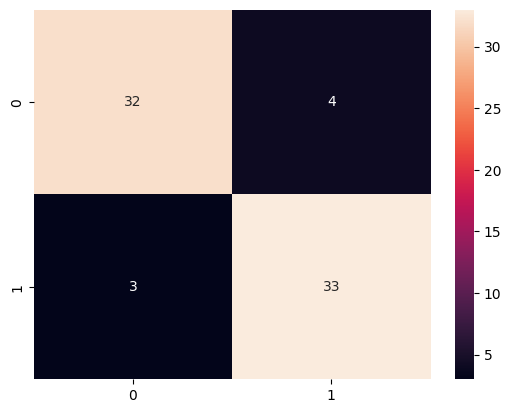

In [ ]:
pre_syn = saved_syn_model.predict(X_test)

predict_syn = []

for pre in pre_syn:
    max_value = max(pre)
    index = list(pre).index(max_value)
    predict_syn.append(index)

# extract the predicted class labels
cm_syn = confusion_matrix(y_test,predict_syn)

sns.heatmap(cm_syn, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test,predict_syn))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.89      0.92      0.90        36

    accuracy                           0.90        72
   macro avg       0.90      0.90      0.90        72
weighted avg       0.90      0.90      0.90        72



In [ ]:
test_loss, test_acc = saved_syn_model.evaluate(X_test, y_test, verbose=0)
test_acc

0.9027777910232544

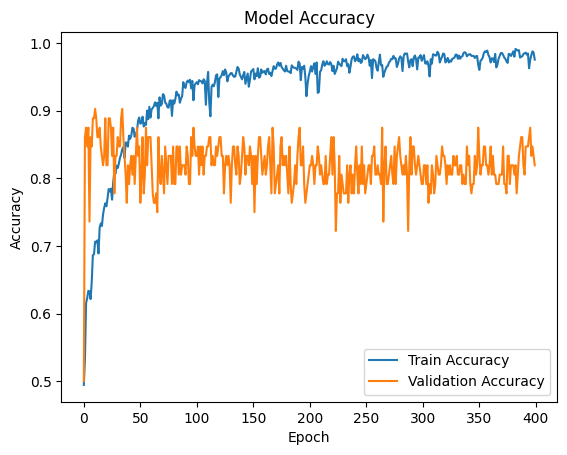

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_syn.history['accuracy'], label='Train Accuracy')
plt.plot(history_syn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('accuracy_vs_epoch.png')
plt.show()

# Synthetic Data + feature selection

In [ ]:
df_sel_test = pd.read_csv("/content/pcos_test.csv")
y_sel_test = df_sel_test['PCOS_diagnosis'].to_numpy()
X_sel_test = df_sel_test[feature_order_syn_sel].drop(columns=["PCOS_diagnosis"]).to_numpy()

In [ ]:
model_syn_sel = AnnModel(18,61,len(X_syn_sel[0])).model
mc_syn_sel = ModelCheckpoint('best_model_syn_fea_sel.h5', monitor='val_accuracy', mode='max', save_best_only=True)
model_syn_sel.compile(loss=keras.losses.sparse_categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])
history_syn_sel = model_syn_sel.fit(X_syn_sel, y_syn_sel, epochs=400, validation_data=(X_sel_test,y_sel_test), callbacks=[mc_syn_sel])
# load the saved model
saved_syn_sel_model = load_model('best_model_syn_fea_sel.h5')

Epoch 1/400
47/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5426 - loss: 0.6830

52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5487 - loss: 0.6805 - val_accuracy: 0.8750 - val_loss: 0.4636
Epoch 2/400
48/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6942 - loss: 0.6126

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6947 - loss: 0.6122 - val_accuracy: 0.8889 - val_loss: 0.4818
Epoch 3/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7166 - loss: 0.6007 - val_accuracy: 0.8889 - val_loss: 0.4078
Epoch 4/400
51/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7112 - loss: 0.5943

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7116 - loss: 0.5940 - val_accuracy: 0.9167 - val_loss: 0.4302
Epoch 5/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7023 - loss: 0.5986 - val_accuracy: 0.8889 - val_loss: 0.3591
Epoch 6/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7218 - loss: 0.5716 - val_accuracy: 0.8889 - val_loss: 0.3620
Epoch 7/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7178 - loss: 0.5806 - val_accuracy: 0.8889 - val_loss: 0.3158
Epoch 8/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7127 - loss: 0.5871 - val_accuracy: 0.8889 - val_loss: 0.3138
Epoch 9/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7195 - loss: 0.5778 - val_accuracy: 0.8889 - val_loss: 0.3178
Epoch 10/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7156 - loss: 0.5778 - val_accuracy: 0.9167 - val_loss: 0.4266
Epoch 11/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7185 - loss: 0.5829 - val_accuracy: 0.8889 - val_loss: 0

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7130 - loss: 0.5821 - val_accuracy: 0.9306 - val_loss: 0.3756
Epoch 14/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6940 - loss: 0.6113 - val_accuracy: 0.8889 - val_loss: 0.4098
Epoch 15/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7232 - loss: 0.5731 - val_accuracy: 0.9167 - val_loss: 0.3714
Epoch 16/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7128 - loss: 0.5732 - val_accuracy: 0.8889 - val_loss: 0.3151
Epoch 17/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7195 - loss: 0.5756 - val_accuracy: 0.9306 - val_loss: 0.3870
Epoch 18/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7208 - loss: 0.5699 - val_accuracy: 0.8750 - val_loss: 0.3824
Epoch 19/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7158 - loss: 0.5858 - val_accuracy: 0.8889 - val_loss: 0.3395
Epoch 20/400
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7044 - loss: 0.5836 - val_accuracy: 0.8889 - val_lo

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step


<Axes: >

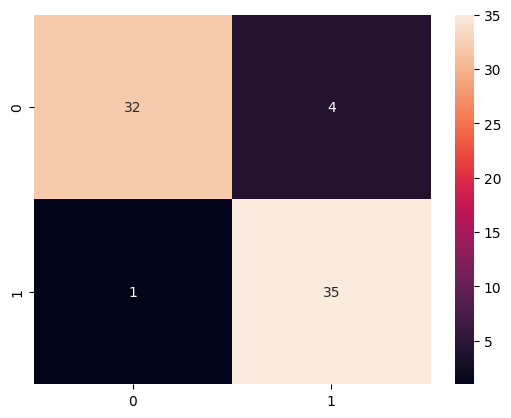

In [ ]:
pre_syn_sel = saved_syn_sel_model.predict(X_test)

predict_syn_sel = []

for pre in pre_syn_sel:
    max_value = max(pre)
    index = list(pre).index(max_value)
    predict_syn_sel.append(index)

# extract the predicted class labels
cm_syn_sel = confusion_matrix(y_test,predict_syn_sel)

sns.heatmap(cm_syn_sel, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test,predict_syn_sel))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.90      0.97      0.93        36

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72



In [ ]:
test_loss_syn_sel, test_acc_syn_sel = saved_syn_sel_model.evaluate(X_test, y_test, verbose=0)
test_acc_syn_sel

0.9305555820465088

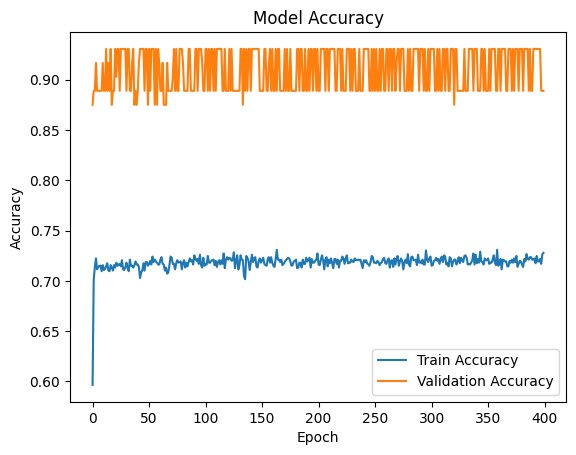

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_syn_sel.history['accuracy'], label='Train Accuracy')
plt.plot(history_syn_sel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('accuracy_vs_epoch.png')
plt.show()

# Only do feature selection

In [ ]:
y_train_sel = df_origin['PCOS_diagnosis'].to_numpy()
X_train_sel = df_origin[feature_order_syn_sel].drop(columns=["PCOS_diagnosis"]).to_numpy()

In [ ]:
model_sel = AnnModel(18,61,len(X_train_sel[0])).model
mc_sel = ModelCheckpoint('best_model_fea_sel.h5', monitor='val_accuracy', mode='max', save_best_only=True)
model_sel.compile(loss=keras.losses.sparse_categorical_crossentropy,
                      optimizer=keras.optimizers.Adam(),
                      metrics=['accuracy'])
history_sel = model_sel.fit(X_train_sel, y_train_sel, epochs=400, validation_data=(X_sel_test,y_sel_test), callbacks=[mc_sel])
# load the saved model
saved_sel_model = load_model('best_model_fea_sel.h5')

Epoch 1/400
13/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4987 - loss: 0.6921 

21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5572 - loss: 0.6868 - val_accuracy: 0.7222 - val_loss: 0.5494
Epoch 2/400
14/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7775 - loss: 0.5535 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8035 - loss: 0.5306 - val_accuracy: 0.9028 - val_loss: 0.2873
Epoch 3/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8752 - loss: 0.3518 - val_accuracy: 0.9028 - val_loss: 0.2659
Epoch 4/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8647 - loss: 0.3769 - val_accuracy: 0.9028 - val_loss: 0.2378
Epoch 5/400
10/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8742 - loss: 0.3252 

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8762 - loss: 0.3239 - val_accuracy: 0.9444 - val_loss: 0.2642
Epoch 6/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8554 - loss: 0.3581 - val_accuracy: 0.9028 - val_loss: 0.2210
Epoch 7/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8617 - loss: 0.3636 - val_accuracy: 0.9028 - val_loss: 0.2219
Epoch 8/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8866 - loss: 0.3062 - val_accuracy: 0.9444 - val_loss: 0.2231
Epoch 9/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8609 - loss: 0.3346 - val_accuracy: 0.9444 - val_loss: 0.2278
Epoch 10/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8605 - loss: 0.3379 - val_accuracy: 0.9306 - val_loss: 0.2308
Epoch 11/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8692 - loss: 0.3144 - val_accuracy: 0.9444 - val_loss: 0.2348
Epoch 12/400
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8659 - loss: 0.3357 - val_accuracy: 0.9306 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step


<Axes: >

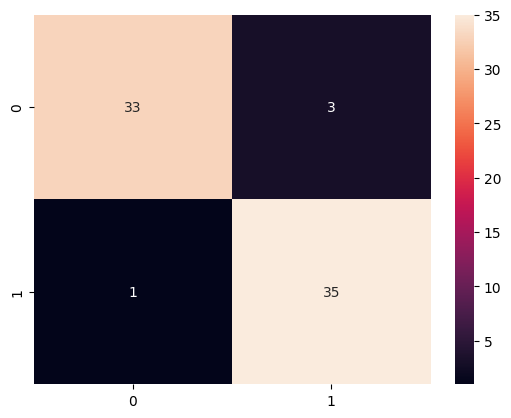

In [ ]:
pre_sel = saved_sel_model.predict(X_test)

predict_sel = []

for pre in pre_sel:
    max_value = max(pre)
    index = list(pre).index(max_value)
    predict_sel.append(index)

# extract the predicted class labels
cm_sel = confusion_matrix(y_test,predict_sel)

sns.heatmap(cm_sel, annot=True, fmt='g')

In [ ]:
print(classification_report(y_test,predict_sel))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        36
           1       0.92      0.97      0.95        36

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



In [ ]:
test_loss_sel, test_acc_sel = saved_sel_model.evaluate(X_test, y_test, verbose=0)
test_acc_sel

0.9444444179534912

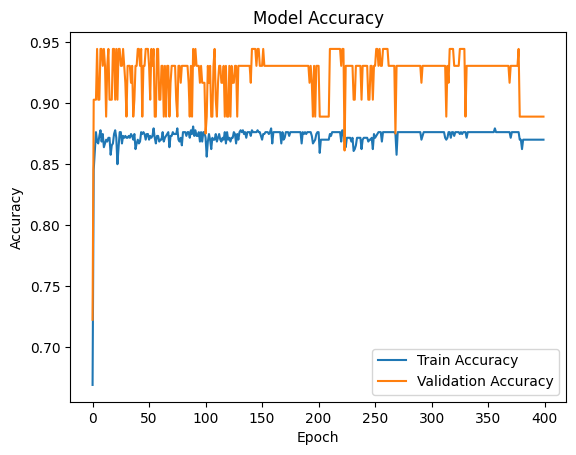

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history_sel.history['accuracy'], label='Train Accuracy')
plt.plot(history_sel.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.savefig('accuracy_vs_epoch.png')
plt.show()